Primeras filas del DataFrame:
             0         1        2
0     Column1   Column2  Column3
1     Pruebas       NaN      NaN
2         NaN       NaN      NaN
3      Semana  Selenium  Cypress
4  2019-12-01        45       88
Columnas detectadas: Index(['Semana', 'Selenium', 'Cypress'], dtype='object')
Primeras filas procesadas del DataFrame:
        Semana Selenium Cypress
0  2019-12-01       45      88
1  2019-12-08       48      82
2  2019-12-15       48      87
3  2019-12-22       35      85
4  2019-12-29       32      95


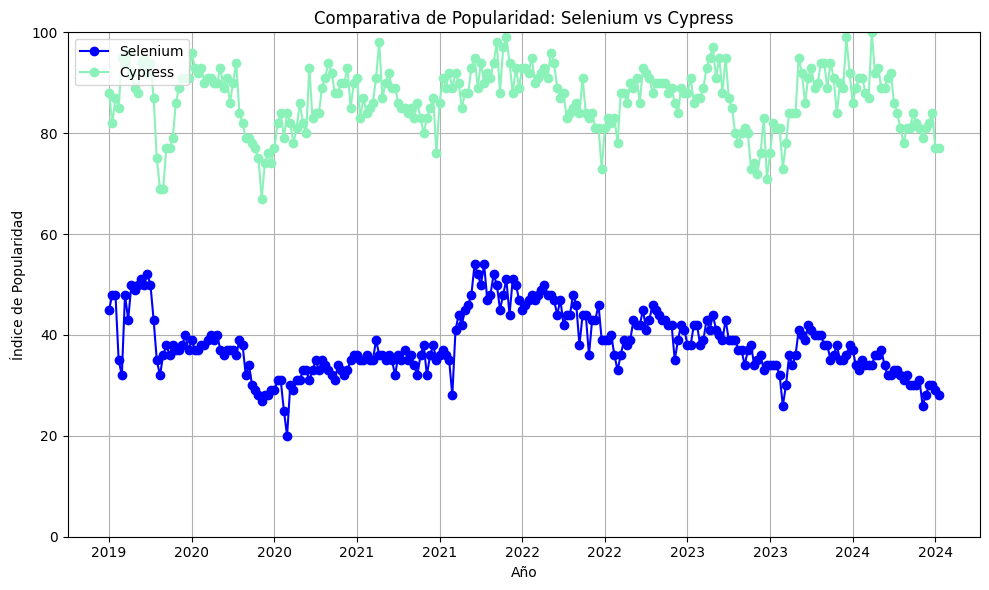

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Ruta del archivo
file_path = "D:/Documents/complementario-3125033/06-Sesión/Selenium - Cypress/seleniumCypress.xlsx"

# Leer el archivo completo
data = pd.read_excel(file_path, header=None)  # No asumimos encabezados, cargamos todo
print("Primeras filas del DataFrame:\n", data.head())  # Verifica cómo se cargaron los datos

# Localizar los encabezados reales
headers_row = data[data.iloc[:, 0] == "Semana"].index[0]  # Encuentra la fila donde empieza "Semana"
data.columns = data.iloc[headers_row]  # Usa esa fila como nombres de columna
data = data[headers_row + 1:].reset_index(drop=True)  # Filtra los datos por debajo de los encabezados
data.columns.name = None  # Limpia el nombre del índice de columnas

# Verificar los nombres finales de las columnas
print("Columnas detectadas:", data.columns)
print("Primeras filas procesadas del DataFrame:\n", data.head())

# Extraer columnas relevantes
semanas = pd.to_datetime(data['Semana'], errors='coerce')  # Convertir la columna 'Semana' a datetime
selenium = pd.to_numeric(data['Selenium'], errors='coerce')  # Aseguramos conversión numérica
cypress = pd.to_numeric(data['Cypress'], errors='coerce')

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(semanas, selenium, label='Selenium', color='blue', marker='o')
plt.plot(semanas, cypress, label='Cypress', color='#8af2b9', marker='o')

# Personalización del gráfico
plt.ylim(0, 100)
plt.xticks(semanas[::len(semanas)//10], [str(year) for year in semanas.dt.year[::len(semanas)//10]])  # Ajustar las etiquetas de años
plt.xlabel('Año')
plt.ylabel('Índice de Popularidad')
plt.title('Comparativa de Popularidad: Selenium vs Cypress')
plt.legend()
plt.grid()

# Mover la leyenda al lado izquierdo
plt.legend(loc='upper left')  # Aquí se especifica la ubicación de la leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()